# MIDAS 2021 Summer Internship Evaluation Task 3 - NLP 

## Task : Use a given dataset to build a model to predict the category using description.


Environment : I used a conda environment in my local machine (Ubuntu 18.04) to complete this task.

Steps Followed : 

1. Data Exploration - Interpretation, Cleaning & Visualization
2. Setup ML Models - Training & Testing Data on various ML Algorithms
3. Iterative Data Processing -Optimization , Feature modifications, removing outliers/skewed data


# Step 1 : Data Exploration

In [1]:
# Importing the required libraries
import nltk
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Dataset is given in csv form. So, import dataset as csv file using pandas.
data = pd.read_csv("flipkart_inventory.csv")

### Exploring Data

In [3]:
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

The given dataset has lots of columns which don't help in predicting the category. Though these columns are not
causing any problems other than computing power, I would still like to remove them so I can analyze the relevant
columns better.

Irrelevant columns to remove are : 

* uniq_id
* crawl_timestamp
* product_url
* pid
* retail_price
* discounted_price
* image
* is_FK_Advantage_product
* product_rating
* overall_rating

Although brand as a feature looks promising, however it has almost 25% of data missing. Therefore it should be removed as well.

In [5]:
data = data.drop(['uniq_id', 'crawl_timestamp', 'product_url', 'pid', 'retail_price', 'discounted_price', 'image',
          'is_FK_Advantage_product', 'product_rating', 'overall_rating', 'brand'], axis = 1)

product_specifications and product_name can be good features for the task. However, as per condition of the task, 'description' should be the main feature. Therefore I won't be using these features too.

In [6]:
data = data.drop(['product_name', 'product_specifications'], axis = 1)
data.head()

,product_category_tree,description
0,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...
1,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...
3,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...
4,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_category_tree  20000 non-null  object
 1   description            19998 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


From the above table, two products have their description missing. Since description is the only feature being used, its not possible to predict their category. Therefore remove those rows.

In [8]:
# Find rows which contain null value in 'description' column
data[data['description'].isnull()].index

Int64Index([553, 17299], dtype='int64')

In [9]:
# Drop null rows.
# inplace = True makes the change permanent.
data.drop([553, 17299] , inplace = True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19998 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_category_tree  19998 non-null  object
 1   description            19998 non-null  object
dtypes: object(2)
memory usage: 468.7+ KB


### The Task demands figuring out the primary category, and using it in the model.

I believe the primary category to be the root of every row of the product_category_tree.

Reason #1 : Primary means first i.e. the first category.

Reason #2 : Taking an example of 'Pet Supplies >> Grooming'. Grooming can't be the primary category as grooming can stand for both humans and pets. Therefore, before Grooming, the category should be either 'Pet Supplies', or 'Men/Women/Kids'. This means the primary category should be the root of the tree.

In [11]:
# Create an empty column for Primary Category
data["primary_category"] = ""
data.head()

,product_category_tree,description,primary_category
0,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,
1,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,
2,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,
3,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,
4,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,


Observation 1 :  each row of the product_category_tree starts with \[\" and ends with \"\]

Observation 2 : Some rows do not have sub-categories. i.e. the Primary category is the only category.
                This means those entries won't have '>>'. (Experiment Log #1)

In [12]:
# Removing the starting and ending tags.
data["product_category_tree"] = data["product_category_tree"].str.slice(2, -2, 1)
print(data['product_category_tree'])

0        Clothing >> Women's Clothing >> Lingerie, Slee...
1        Furniture >> Living Room Furniture >> Sofa Bed...
2        Footwear >> Women's Footwear >> Ballerinas >> ...
3        Clothing >> Women's Clothing >> Lingerie, Slee...
4        Pet Supplies >> Grooming >> Skin & Coat Care >...
                               ...                        
19995    Baby Care >> Baby & Kids Gifts >> Stickers >> ...
19996    Baby Care >> Baby & Kids Gifts >> Stickers >> ...
19997    Baby Care >> Baby & Kids Gifts >> Stickers >> ...
19998    Baby Care >> Baby & Kids Gifts >> Stickers >> ...
19999    Baby Care >> Baby & Kids Gifts >> Stickers >> ...
Name: product_category_tree, Length: 19998, dtype: object


In [13]:
# Splitting entries around the '>>' and populating primary_category column
data['primary_category'] = data['product_category_tree'].str.split(' >>').str[0]
print(data['primary_category'])

0            Clothing
1           Furniture
2            Footwear
3            Clothing
4        Pet Supplies
             ...     
19995       Baby Care
19996       Baby Care
19997       Baby Care
19998       Baby Care
19999       Baby Care
Name: primary_category, Length: 19998, dtype: object


In [14]:
# To check how many unique categories are present
print(len(data['primary_category'].value_counts()))

265


In [15]:
# Confirming absence of null data
data["primary_category"].isnull().sum()

0

In [16]:
# This can also be done using the single command below
data.describe()

,product_category_tree,description,primary_category
count,19998,19998,19998
unique,6466,17539,265
top,Jewellery >> Necklaces & Chains >> Necklaces,TheLostPuppy Back Cover for Apple iPad Air (Mu...,Clothing
freq,1567,92,6197


In [17]:
# Lets check out the number of products in each unique group of 'primary_category' column
print(data['primary_category'].value_counts())

Clothing                                               6197
Jewellery                                              3531
Footwear                                               1227
Mobiles & Accessories                                  1099
Automotive                                             1012
                                                       ... 
kem Flow Gold skinny Fit Baby Girl's Blue Jeans           1
NEWGEN TECH EO-HS3303 58 Wired Headset (White)            1
e-Fresh Boy's Brief (Pack of 5)                           1
AutoKraftZ Optimum Locking Device For Bajaj Puls...       1
OEM 170774 Bike Side Stand                                1
Name: primary_category, Length: 265, dtype: int64


At the end of the list, we see a number of items which don't seem to have a generic category.

They look quite specific, and since there is only 1 product in these specific categories, they cannot be used as primary category. Let's see if we can further manipulate this data, or we have to remove it.

In [18]:
value_count = data['primary_category'].value_counts()
print(value_count[value_count > 2])

Clothing                                               6197
Jewellery                                              3531
Footwear                                               1227
Mobiles & Accessories                                  1099
Automotive                                             1012
Home Decor & Festive Needs                              929
Beauty and Personal Care                                710
Home Furnishing                                         699
Kitchen & Dining                                        647
Computers                                               578
Watches                                                 530
Baby Care                                               483
Tools & Hardware                                        391
Toys & School Supplies                                  330
Pens & Stationery                                       313
Bags, Wallets & Belts                                   265
Furniture                               

There are certain categories (having items < 10), which also seem quite specific to be primary categories.
However, they have multiple products in each, still they are not primary categories.

Therefore, we can either remove these specific categories, or manually categorize them into better primary categories.



In [19]:
print(str(len(value_count[value_count < 3])) + " categories have less than 3 objects in them --> 217 objects dont have any category")

217 categories have less than 3 objects in them --> 217 objects dont have any category


In [20]:
print(str(len(value_count[value_count >= 10])) + " categories have more than or equal to 10 objects in them")

28 categories have more than or equal to 10 objects in them


<AxesSubplot:>

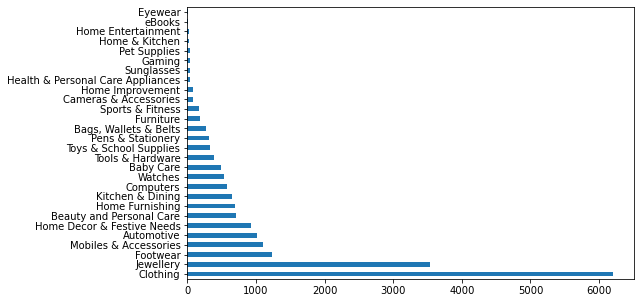

In [21]:
# Visualizing the main categories
data['primary_category'].value_counts()[:28].plot(kind = 'barh', figsize=(8, 5))

The 1 to 2 item categories are outliers which will **interfere** with the prediction model. They need to be removed.

Arranging the 193 one-category items would be a big manual task. Its better to remove this data.

There is a good primary category called Household Supplies, which has 4 items. Since its a primary category, we cannot just remove it. Since its manually possible, we can try to categorize some categories into better primary categories.

For the 20 categories having items less than 10, we can categorize them into better primary categories manually.

### As a preliminary step, I will keep the data as it is, and run ML models to see how accurate the model is working.

# Step 2 : Setup ML Models

In [22]:
# Preparing Training Data
X = data['description']
y = data['primary_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 77)
print("X Training Set : ", X_train.shape)
print("X Test Set : ", X_test.shape)

X Training Set :  (13998,)
X Test Set :  (6000,)


## Vectorizing Text Data for Feature Extraction

I'll be using CountVectorizer & TF-IDFVectorizer to extract features using Linear Support Vector Machine Algorithm. Linear SVC is considered to be one of the best algorithms for Text Classification.

Based on their performance, the specific vectorizer will be used alongside the ML algorithms through the 
scikit-learn pipeline.

## Using Pipeline for SVC with CountVectorizer

In [23]:
# Text Feature extraction with CountVectorizer
clf_cvec_lsvc = Pipeline([('cvec', CountVectorizer()),
                     ('clf', LinearSVC())])

# Feed the training data through the pipeline
clf_cvec_lsvc.fit(X_train, y_train)

# Form a prediction set
predictions = clf_cvec_lsvc.predict(X_test.astype('U').values)

# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

/home/aryan/anaconda3/envs/machinelearning/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9553333333333334


## Using Pipeline for SVC with TF-IDF Vectorizer

In [24]:
# Text Feature extraction with TF-IDF
clf_tfidf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC())])
# Feed the training data through the pipeline
clf_tfidf_lsvc.fit(X_train, y_train)

# Form a prediction set
predictions = clf_tfidf_lsvc.predict(X_test.astype('U').values)

# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.9633333333333334


### TF-IDF gives better accuracy than CountVectorizer. Therefore, I will use TF-IDF along with other ML Models too.

## Using Pipeline for Naive Bayes

In [25]:
# Naive Bayes
clf_tfidf_mnb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB())])

# Feed the training data through the pipeline
clf_tfidf_mnb.fit(X_train, y_train)  

# Form a prediction set
predictions = clf_tfidf_mnb.predict(X_test.astype('U').values)

# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.7816666666666666


## Using Pipeline for Logistic Regression

In [26]:
# Logistic Regression
clf_tfidf_lr = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LogisticRegression())])

# Feed the training data through the pipeline
clf_tfidf_lr.fit(X_train, y_train)

# Form a prediction set
predictions = clf_tfidf_lr.predict(X_test.astype('U').values)

# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

/home/aryan/anaconda3/envs/machinelearning/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9386666666666666


## Using Pipeline for K Nearest Neighbours (KNN) Classifier

In [27]:
# KNN Classifier
clf_tfidf_knc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', KNeighborsClassifier())])

# Feed the training data through the pipeline
clf_tfidf_knc.fit(X_train, y_train)

# Form a prediction set
predictions = clf_tfidf_knc.predict(X_test.astype('U').values)

# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.9381666666666667


## Using Pipeline for Random Forest

In [28]:
# Random Forest
clf_tfidf_rfc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', RandomForestClassifier())])

# Feed the training data through the pipeline
clf_tfidf_rfc.fit(X_train, y_train)

# Form a prediction set
predictions = clf_tfidf_rfc.predict(X_test.astype('U').values)

# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.9268333333333333


The best accuracy till now is through Linear SVC(96.33%). I will therefore use this model to make further improvements.

# Step 3 : Iterative Data Processing

## A. Cleaning data in the description column

In [29]:
# Lets take the example of a random description
data['description'][45]

"Specifications of Vishudh Printed Women's Straight Kurta Kurta Details Sleeve Sleeveless Number of Contents in Sales Package Pack of 1 Fabric 100% POLYESTER Type Straight Neck ROUND NECK General Details Pattern Printed Occasion Festive Ideal For Women's In the Box Kurta Additional Details Style Code VNKU004370 PINK::OLIVE Fabric Care Gentle Machine Wash in Lukewarm Water, Do Not Bleach"

In [30]:
# Applying data preprocessing techniques
data['description'] = data['description'].str.lower()  # Lowercase
data['description'] = data['description'].str.replace('http\S+', '')  # Remove links
data["description"] = data['description'].str.replace('[^\w\s]',' ')  # Remove Punctuations
data["description"] = data['description'].str.replace('\w*\d\w*','')  # Remove Strings containing numbers i.e. codes & NUmbers
data["description"] = data['description'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')  # Remove single alphabets & extra spaces
data['description'][45]

'specifications of vishudh printed women straight kurta kurta details sleeve sleeveless number of contents in sales package pack of fabric polyester type straight neck round neck general details pattern printed occasion festive ideal for women in the box kurta additional details style code pink olive fabric care gentle machine wash in lukewarm water do not bleach'

### Removing Stopwords

In [31]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'needn', 'haven', 'over', 'such', 'which', 'about', "that'll", 'here', 'for', 'have', 'of', "won't", 've', "hasn't", 'they', 'who', 'no', "it's", 'as', 'has', 'i', 'am', 'will', 'doesn', 'my', "mightn't", "wouldn't", 'her', 'until', 'itself', 'while', 'ours', 'not', 'whom', "you're", 'after', 'can', 'being', 'had', 'to', 'd', 'but', 'wasn', 'into', 'at', "mustn't", 'himself', 'above', 'any', 'ain', 'against', 'o', "don't", 'mustn', 'or', 'under', 'you', "aren't", 'theirs', 'further', 'does', 'this', 'hasn', 'yourself', 'he', 'weren', 'all', 's', 'didn', 'wouldn', 'myself', "you'd", 'hers', 'other', 'own', 'and', 'from', 'most', 'should', 'is', 'how', 'their', "doesn't", "should've", "weren't", 'couldn', 'both', 'we', 'where', 'did', 'y', "wasn't", 'each', 'be', 'only', 'so', 'very', 'don', 'what', 'between', 'me', "couldn't", 'she', 'them', 'before', 'up', 're', 'then', 'was', 'in', 'by', 'aren', "shan't", "isn't", 'once', 'ma', 'isn', 'during', 'out', 'll', "she's", 'than', 't', 'the

### Training Model

In [32]:
# Preparing Data
X = data['description']
y = data['primary_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)
print("X Training Set : ", X_train.shape)
print("X Test Set : ", X_test.shape)

X Training Set :  (13998,)
X Test Set :  (6000,)


### Using pipeline for Linear SVC with TF-IDF and removing stopwords

In [33]:
clf_tfidf_lsvc2 = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words)),
                     ('clf', LinearSVC())])

# Feed the training data through the pipeline
clf_tfidf_lsvc2.fit(X_train, y_train)

predictions = clf_tfidf_lsvc2.predict(X_test.astype('U').values)
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.9645


**There is an increase from 96.33% to 96.45%, after preprocessing data of description column.**

I further tried adding more stopwords, but that decreased the accuracy of the model. (Experiment Log #2)

## B. Removing outlier data

### Now I will remove the 217 rows of skewed data, and test the model again.

<AxesSubplot:ylabel='primary_category'>

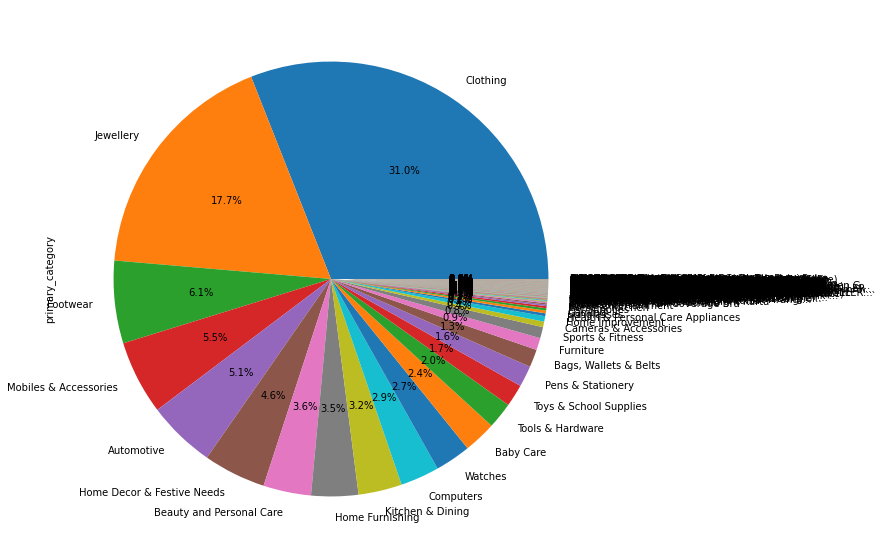

In [34]:
# Visualizing unique groups of primary_category
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
data['primary_category'].value_counts().plot.pie(autopct = '%1.1f%%')

The right part of the chart consists of categories which contain less than 1% of the products. These products and their categories should be removed for better performance of the model.

In [35]:
# Lets try by removing the skewed data
vc_new = data['primary_category'].value_counts()
print (len(vc_new[vc_new < 3]))

217


Implies 217 rows can be removed.

In [36]:
counts = data['primary_category'].value_counts()
data = data[~data['primary_category'].isin(counts[counts < 3].index)]
data.shape

(19757, 3)

## Training Model

In [37]:
# Preparing Data
X = data['description']
y = data['primary_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 77) # max at 77

In [38]:
clf_tfidf_lsvc2 = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words)),
                     ('clf', LinearSVC())])

# Feed the training data through the pipeline
clf_tfidf_lsvc2.fit(X_train, y_train)

predictions = clf_tfidf_lsvc2.predict(X_test.astype('U').values)

# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.9760458839406208


### **Accuracy of the Model increased to 97.6 % from 96.45%.**

## C. Curating sub-categories to super-categories

For the 20 categories having items less than 10, we can categorize them into better primary categories manually.

In [39]:
data.loc[(data.primary_category == "Clovia Women's Full Coverage Bra"), 'primary_category']='Clothing'
data.loc[(data.primary_category == "Lilliput Top Baby Girl's  Combo"), 'primary_category']='Clothing'
data.loc[(data.primary_category == "Vishudh Printed Women's Straight Kurta"), 'primary_category']='Clothing'
data.loc[(data.primary_category == "Olvin Aviator Sunglasses"), 'primary_category']='Sunglasses'
data.loc[(data.primary_category == "Clovia Women's T-Shirt Bra"), 'primary_category']='Clothing'
data.loc[(data.primary_category == "MASARA Solid Women's Straight Kurta"), 'primary_category']='Clothing'
data.loc[(data.primary_category == "FEET FLOW Women Flats"), 'primary_category']='Footwear'
data.loc[(data.primary_category == "Dressberry Gold Synthetic  Clutch"), 'primary_category']='Jewellery'
data.loc[(data.primary_category == "Olvin Wayfarer Sunglasses"), 'primary_category']='Sunglasses'
data.loc[(data.primary_category == "Pu-Good Women Flats"), 'primary_category']='Footwear'
data.loc[(data.primary_category == "Indistar Self Design Viscose Women's Stole"), 'primary_category']='Clothing'
data.loc[(data.primary_category == "Ruhi's Creations Polyester Silk Blend Cartoon Ki..."), 'primary_category']='Clothing'
data.loc[(data.primary_category == "Pout Brass Bangle"), 'primary_category']='Jewellery'
data.loc[(data.primary_category == "Dilan Jewels Alloy Zircon 18K Yellow Gold Bangle..."), 'primary_category']='Jewellery'
data.loc[(data.primary_category == "Frabjous German silver Rings For Women Alloy Zir..."), 'primary_category']='Jewellery'
data.loc[(data.primary_category == "Treppe Bellies"), 'primary_category']='Footwear'
data.loc[(data.primary_category == "Dassler Slim Fit Women's Multicolor Jeans"), 'primary_category']='Clothing'
data.loc[(data.primary_category == "Olvin Oval Sunglasses"), 'primary_category']='Sunglasses'
data.loc[(data.primary_category == "Firangi Cotton, Polyester Free Floor Mat Firangi..."), 'primary_category']='Home Furnishing'

# Sunglasses can themselves be a part of Eyewear
data.loc[(data.primary_category == "Sunglasses"), 'primary_category']='Eyewear'

In [40]:
# List unique groups in primary_category
value_count = data['primary_category'].value_counts()
print(value_count[value_count > 1])

Clothing                             6242
Jewellery                            3544
Footwear                             1238
Mobiles & Accessories                1099
Automotive                           1012
Home Decor & Festive Needs            929
Beauty and Personal Care              710
Home Furnishing                       703
Kitchen & Dining                      647
Computers                             578
Watches                               530
Baby Care                             483
Tools & Hardware                      391
Toys & School Supplies                330
Pens & Stationery                     313
Bags, Wallets & Belts                 265
Furniture                             180
Sports & Fitness                      166
Cameras & Accessories                  82
Home Improvement                       81
Eyewear                                64
Health & Personal Care Appliances      43
Gaming                                 35
Pet Supplies                      

<AxesSubplot:ylabel='primary_category'>

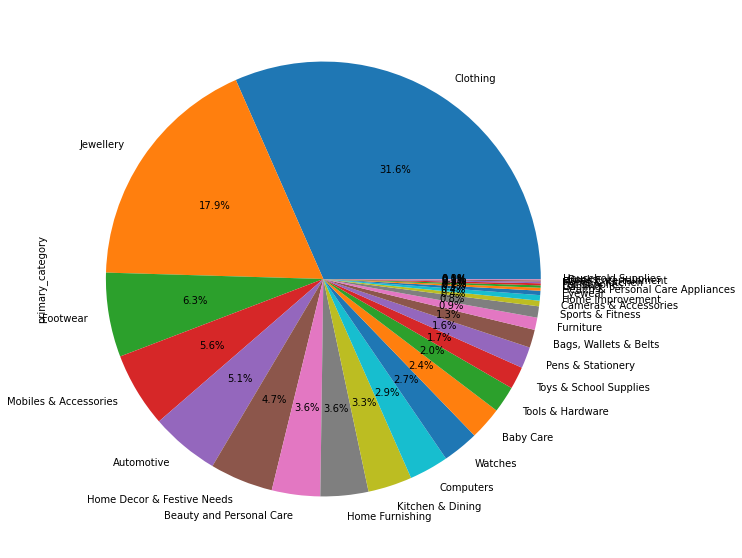

In [41]:
# Visualizing unique groups of primary_category
fig, ax = plt.subplots(1, 1, figsize=(10,10))
data['primary_category'].value_counts().plot.pie(autopct = '%1.1f%%')

## Training Model

In [42]:
# Preparing Data
X = data['description']
y = data['primary_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 77) # max at 77

In [43]:
clf_tfidf_lsvc2 = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words)),
                     ('clf', LinearSVC())])

# Feed the training data through the pipeline
clf_tfidf_lsvc2.fit(X_train, y_train)

predictions = clf_tfidf_lsvc2.predict(X_test.astype('U').values)

# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.979251012145749


## Measuring Accuracy of Model

In [44]:
# Report the confusion matrix
print(metrics.confusion_matrix(y_test,predictions))
# Print a classification report
print(metrics.classification_report(y_test,predictions))

[[ 320    0    0    0    0    0    0    0    0    0    1    0    0    1
     1    0    0    0    0    1    0    0    0    0    0    0    0    0]
 [   1  118    0    0    0    7    0    0    0    0    0    0    0    5
     0    4    0    0    0    0    0    0    0    1    0    2    0    0]
 [   0    0   66    1    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    1    0    0    0    0    0    0    0    0    0]
 [   0    0    0  208    0    1    0    0    0    0    0    0    0    1
     0    0    0    0    2    1    0    0    0    0    0    1    0    0]
 [   1    0    0    0   25    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    4    0    0    0 1840    0    0    0    0    0    0    0    0
     0    0    0    0    2    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0  160    0    0    0    0    0    0    0
     0    0    0    0    0    0    6    0    0    0    0  

# Conclusion

### **For this task, the best prediction model was using Linear SVC using TF-IDF Vectorizer, with an accuracy of 97.92%!**

### Improvements

I think the accuracy of the Model can be improved in the following ways : 
* Some of the chosen Primary Categories are similar i.e. Home Decor, Home Furnishings, Home Entertainment. This may be used to create a single category known as ‘Home’. Creating a superclass will always improve accuracy.

* Other columns such as ‘product_name’ and ‘product_specifications’ could have been used as input features to improve the model.

* Using NLP based Deep Learning Models involving Transformer Models, and NLP techniques such as Bag of Words, and Word2Vec, Word Embeddings using Gensim etc.
